# Predicted Chl_a of STIMP and two climate mean state at four locations

In [23]:
import h5py
import scipy
import numpy as np
import torch

In [24]:
base_dir = "./log_bak/prediction/PRE/"
prediction_our = torch.from_numpy(np.load(base_dir+"STIMP/with_imputation/prediction.npy", allow_pickle=True))
prediction_xg_wo = torch.from_numpy(np.load(base_dir+"XGBoost/with_imputation/prediction_0.npy", allow_pickle=True))
prediction_mtgnn = torch.from_numpy(np.load(base_dir+"MTGNN/with_imputation/prediction_0.npy", allow_pickle=True))
prediction_crossformer_wo = torch.from_numpy(np.load(base_dir+"CrossFormer/with_imputation/prediction_0.npy", allow_pickle=True))
prediction_tsmixer_wo = torch.from_numpy(np.load(base_dir+"TSMixer/with_imputation/prediction_0.npy", allow_pickle=True))
prediction_itransformer_wo = torch.from_numpy(np.load(base_dir+"iTransformer/with_imputation/prediction_0.npy", allow_pickle=True))
prediction_predrnn_wo = torch.from_numpy(np.load(base_dir+"PredRNN/with_imputation/prediction_0.npy", allow_pickle=True))
prediction_predrnn = torch.from_numpy(np.load(base_dir+"PredRNN/without_imputation/prediction_0.npy", allow_pickle=True))
prediction_pde = np.load("./data/PRE/cmoms.npy")

In [25]:
raw_data = np.load("./data/PRE/chla.npy")
is_sea = np.load("./data/PRE/is_sea.npy")
raw_data = raw_data[:,is_sea.astype(bool)]

In [26]:
test_start = 602
test_end = 602+276
climatology_start = 4

In [48]:
mean = np.log10(raw_data[:test_start-4])
weekly_mean = np.nanmean(mean.reshape(-1,46,4443),axis=0)

/tmp/ipykernel_1475539/1391948901.py:2: RuntimeWarning: Mean of empty slice
  weekly_mean = np.nanmean(mean.reshape(-1,46,4443),axis=0)


In [46]:
monthly_data = np.log10(np.load("/home/mafzhang/code/STIMP-monthly/data/PRE/chla.npy"))
monthly_data = monthly_data[:,is_sea.astype(bool)]
monthly_mean = np.nanmean(monthly_data[:156].reshape(-1,12, 4443),axis=0)

/tmp/ipykernel_1475539/2943528818.py:3: RuntimeWarning: Mean of empty slice
  monthly_mean = np.nanmean(monthly_data[:156].reshape(-1,12, 4443),axis=0)


In [33]:
import pandas as pd
date = pd.date_range(start='2016-02-02', end='2022-02-10', freq='8D')
label = np.load("./data/PRE/trues.npy")
label_masks = np.load("./data/PRE/true_masks.npy")
index = [46*i for i in range(306//46)]
label_masks = label_masks.squeeze()
label = label.squeeze()
label = torch.from_numpy(label)
label_masks = torch.from_numpy(label_masks)


**Fig 3i Position 1**

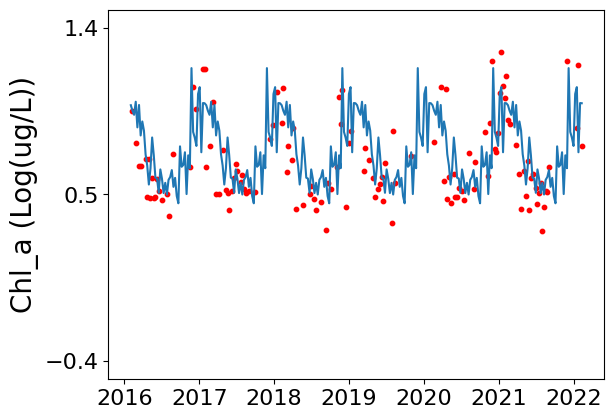

In [ ]:
#CMOMS
from copy import deepcopy
import seaborn as sns
import matplotlib.pyplot as plt
n=803

index = [46*i for i in range(306//46)]
tmp  = deepcopy(label[index].reshape(276,-1))
tmp_mask  = deepcopy(label_masks[index].reshape(276,-1))
tmp[~tmp_mask.bool()]=np.nan
plt.scatter(date, tmp[:,n], c='red', s=10,label="Observed")

predict = np.concatenate([weekly_mean for i in range(306//46)])
predict = predict[:,n]

plt.plot(date, predict, label="Weekly Mean")

plt.ylim(-0.5,1.5)
plt.xticks(fontsize=16)

plt.yticks([-0.4,0.5,1.4], fontsize=16)
plt.ylabel("Chl_a (Log(ug/L))", fontsize=20)
plt.show()
print(tmp[:,n]-)

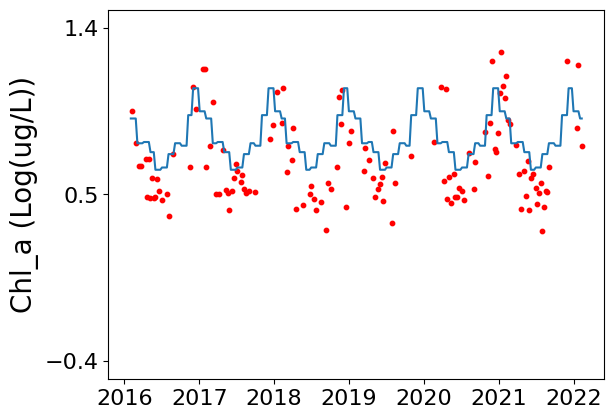

In [35]:
#CMOMS
from copy import deepcopy
import seaborn as sns
import matplotlib.pyplot as plt
n=803

month_index = [1,2,3,4,5,6,7,8,9,10,11,0]

index = [46*i for i in range(306//46)]
tmp  = deepcopy(label[index].reshape(276,-1))
tmp_mask  = deepcopy(label_masks[index].reshape(276,-1))
tmp[~tmp_mask.bool()]=np.nan
plt.scatter(date, tmp[:,n], c='red', s=10,label="Observed")

predict = np.stack([monthly_mean[i.month-1] for i in date],0)
predict = predict[:,n]

plt.plot(date, predict, label="Weekly Mean")

plt.ylim(-0.5,1.5)
plt.xticks(fontsize=16)

plt.yticks([-0.4,0.5,1.4], fontsize=16)
plt.ylabel("Chl_a (Log(ug/L))", fontsize=20)
plt.show()

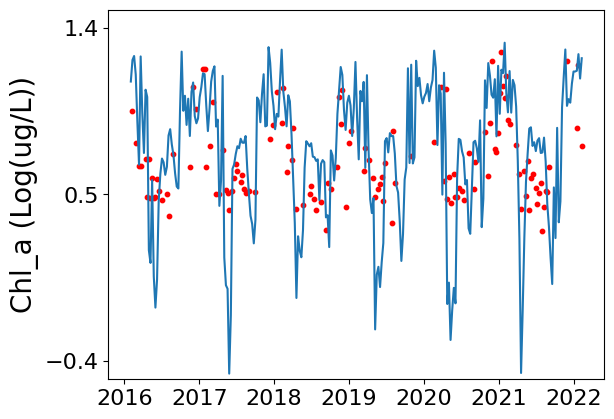

In [10]:
#CMOMS
from copy import deepcopy
import seaborn as sns
import matplotlib.pyplot as plt
n=803

index = [46*i for i in range(306//46)]
tmp  = deepcopy(label[index].reshape(276,-1))
tmp_mask  = deepcopy(label_masks[index].reshape(276,-1))
tmp[~tmp_mask.bool()]=np.nan
plt.scatter(date, tmp[:,n], c='red', s=10,label="Observed")

predict = deepcopy(prediction_pde[:276])
predict = predict[:,n]

plt.plot(date, predict, label="CMOMS")

plt.ylim(-0.5,1.5)
plt.xticks(fontsize=16)

plt.yticks([-0.4,0.5,1.4], fontsize=16)
plt.ylabel("Chl_a (Log(ug/L))", fontsize=20)
plt.show()

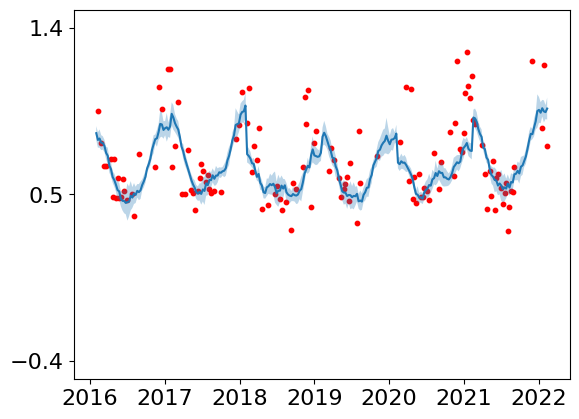

In [11]:
#STIMP
# predict = np.concatenate([prediction_our[i] for i in index], 1)[:,:, n]
plt.scatter(date, tmp[:,n], c='red', s=10,label="Observed")
predict = deepcopy(prediction_our[index].transpose(1,2).reshape(276,10,4443))
predict = predict[:,:,n]
mean = predict.mean(1)
std = predict.std(1)

plt.plot(date, mean, label="STIMP")
plt.fill_between(date, mean-std, mean+std, alpha=0.3)

plt.xticks(fontsize=16)
plt.yticks([])
plt.ylim(-0.5,1.5)
plt.yticks([-0.4,0.5,1.4], fontsize=16)
# plt.ylabel("Chl_a (Log(ug/L))", fontsize=20)
plt.show()

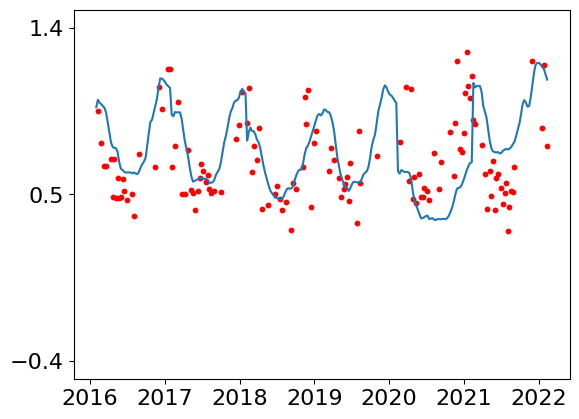

In [12]:
#PredRNN
plt.scatter(date, tmp[:,n], c='red', s=10,label="Observed")
predict = deepcopy(prediction_predrnn[index].reshape(276,4443))
predict = predict[:,n]
plt.plot(date, predict, label="PredRNN")

plt.ylim(-0.5,1.5)
plt.yticks([-0.4,0.5,1.4], fontsize=16)
# plt.ylabel("Chl_a (Log(ug/L))", fontsize=20)
plt.xticks(fontsize=16)
plt.show()

**Fig 3i Position 2**

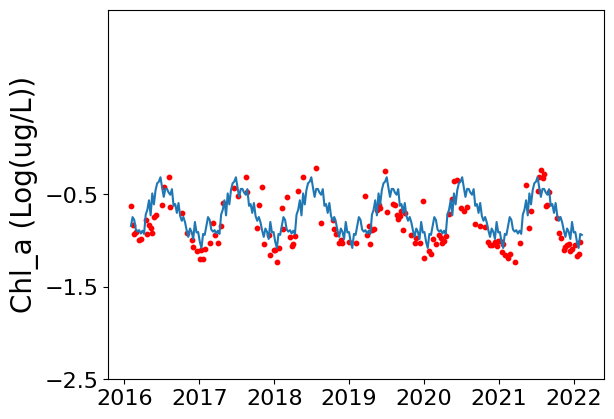

In [36]:
#CMOMS
from copy import deepcopy
import seaborn as sns
import matplotlib.pyplot as plt
n=4006

index = [46*i for i in range(306//46)]
tmp  = deepcopy(label[index].reshape(276,-1))
tmp_mask  = deepcopy(label_masks[index].reshape(276,-1))
tmp[~tmp_mask.bool()]=np.nan
plt.scatter(date, tmp[:,n], c='red', s=10,label="Observed")

predict = np.concatenate([weekly_mean for i in range(306//46)])
predict = predict[:,n]

plt.plot(date, predict, label="Weekly Mean")

plt.ylim(-0.5,1.5)
plt.xticks(fontsize=16)

plt.yticks(np.arange(-2.5, 0.5, 1), fontsize=16)
plt.ylabel("Chl_a (Log(ug/L))", fontsize=20)
plt.show()

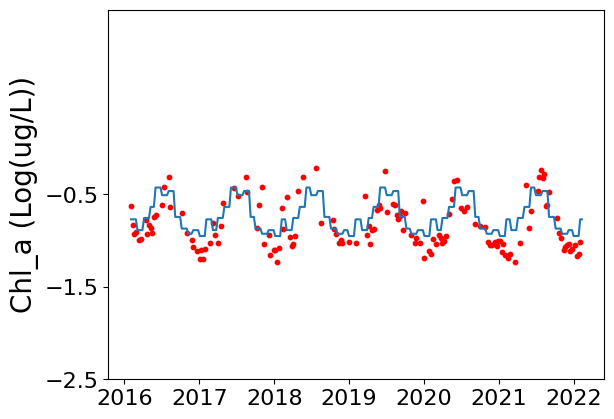

In [37]:
from copy import deepcopy
import seaborn as sns
import matplotlib.pyplot as plt

index = [46*i for i in range(306//46)]
tmp  = deepcopy(label[index].reshape(276,-1))
tmp_mask  = deepcopy(label_masks[index].reshape(276,-1))
tmp[~tmp_mask.bool()]=np.nan
plt.scatter(date, tmp[:,n], c='red', s=10,label="Observed")

predict = np.stack([monthly_mean[i.month-1] for i in date],0)
predict = predict[:,n]

plt.plot(date, predict, label="Weekly Mean")

plt.ylim(-0.5,1.5)
plt.xticks(fontsize=16)

plt.yticks(np.arange(-2.5, 0.5, 1), fontsize=16)
plt.ylabel("Chl_a (Log(ug/L))", fontsize=20)
plt.show()

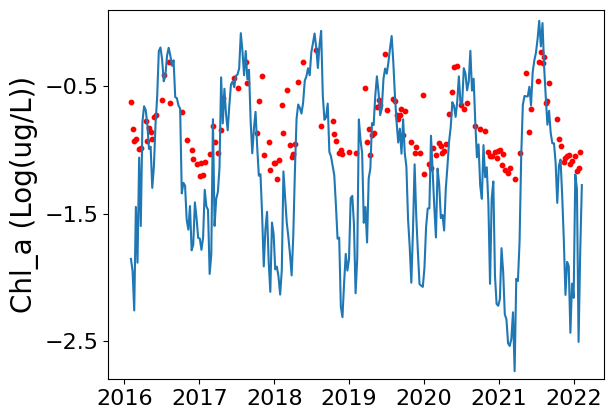

In [15]:
n=4006

index = [46*i for i in range(306//46)]
tmp  = deepcopy(label[index].reshape(276,-1))
tmp_mask  = deepcopy(label_masks[index].reshape(276,-1))
tmp[~tmp_mask.bool()]=np.nan
plt.scatter(date, tmp[:,n], c='red', s=10,label="Observed")

predict = deepcopy(prediction_pde[:276])
predict = predict[:,n]

plt.plot(date, predict, label="CMOMS")

plt.ylim(-2.8,0.1)
plt.yticks(np.arange(-2.5, 0.5, 1), fontsize=16)
plt.ylabel("Chl_a (Log(ug/L))", fontsize=20)
plt.xticks(fontsize=16)
plt.show()

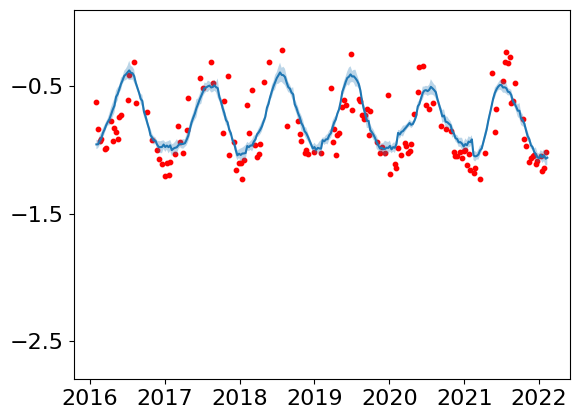

In [16]:
#STIMP
plt.scatter(date, tmp[:,n], c='red', s=10,label="Observed")

predict = deepcopy(prediction_our[index].transpose(1,2).reshape(276,10,4443))
predict = predict[:,:,n]
mean = predict.mean(1)
std = predict.std(1)

plt.plot(date, mean, label="STImp")
plt.fill_between(date, mean-std, mean+std, alpha=0.3)

# plt.legend()
plt.ylim(-2.8,0.1)
plt.yticks(np.arange(-2.5, 0.5, 1), fontsize=16)
# plt.ylabel("Chl_a (Log(ug/L))", fontsize=20)
plt.xticks(fontsize=16)
plt.show()

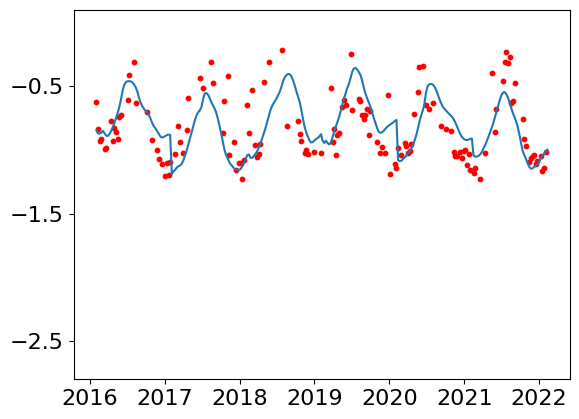

In [17]:
plt.scatter(date, tmp[:,n], c='red', s=10,label="Observed")

predict = deepcopy(prediction_predrnn[index].reshape(276,4443))
predict = predict[:,n]

plt.plot(date, predict, label="STImp")

# plt.legend()
plt.ylim(-2.8,0.1)
plt.yticks(np.arange(-2.5, 0.5, 1), fontsize=16)
# plt.ylabel("Chl_a (Log(ug/L))", fontsize=20)
plt.xticks(fontsize=16)
plt.show()

**Fig 3i Position 3**

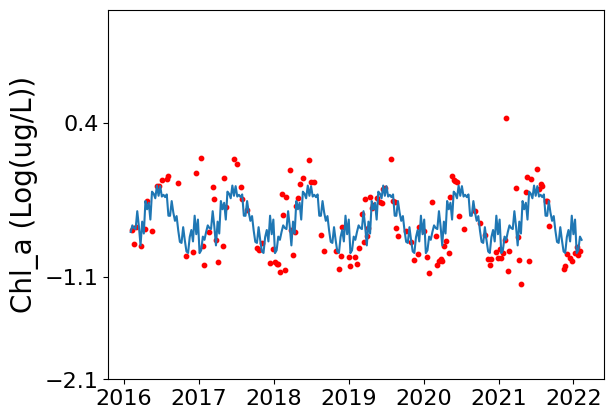

In [38]:
#CMOMS
from copy import deepcopy
import seaborn as sns
import matplotlib.pyplot as plt
n=2667

index = [46*i for i in range(306//46)]
tmp  = deepcopy(label[index].reshape(276,-1))
tmp_mask  = deepcopy(label_masks[index].reshape(276,-1))
tmp[~tmp_mask.bool()]=np.nan
plt.scatter(date, tmp[:,n], c='red', s=10,label="Observed")

predict = np.concatenate([weekly_mean for i in range(306//46)])
predict = predict[:,n]

plt.plot(date, predict, label="Weekly Mean")

plt.ylim(-0.5,1.5)
plt.xticks(fontsize=16)

plt.yticks([-2.1,-1.1,0.4], fontsize=16)
plt.ylabel("Chl_a (Log(ug/L))", fontsize=20)
plt.show()

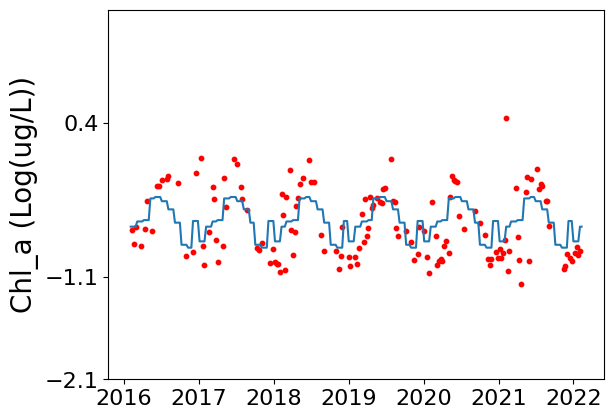

In [39]:
from copy import deepcopy
import seaborn as sns
import matplotlib.pyplot as plt

index = [46*i for i in range(306//46)]
tmp  = deepcopy(label[index].reshape(276,-1))
tmp_mask  = deepcopy(label_masks[index].reshape(276,-1))
tmp[~tmp_mask.bool()]=np.nan
plt.scatter(date, tmp[:,n], c='red', s=10,label="Observed")

predict = np.stack([monthly_mean[i.month-1] for i in date],0)
predict = predict[:,n]

plt.plot(date, predict, label="Weekly Mean")

plt.ylim(-0.5,1.5)
plt.xticks(fontsize=16)

plt.yticks([-2.1,-1.1,0.4], fontsize=16)
plt.ylabel("Chl_a (Log(ug/L))", fontsize=20)
plt.show()

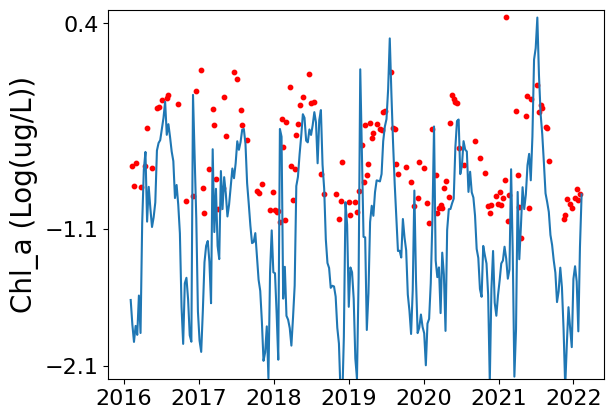

In [20]:
n=2667

index = [46*i for i in range(306//46)]
tmp  = deepcopy(label[index].reshape(276,-1))
tmp_mask  = deepcopy(label_masks[index].reshape(276,-1))
tmp[~tmp_mask.bool()]=np.nan
plt.scatter(date, tmp[:,n], c='red', s=10,label="Observed")

predict = deepcopy(prediction_pde[:276])
predict = predict[:,n]

plt.plot(date, predict, label="CMOMS")

plt.ylim(-2.2,0.5)
plt.xticks(fontsize=16)
plt.yticks([-2.1,-1.1,0.4], fontsize=16)
plt.ylabel("Chl_a (Log(ug/L))", fontsize=20)
plt.show()

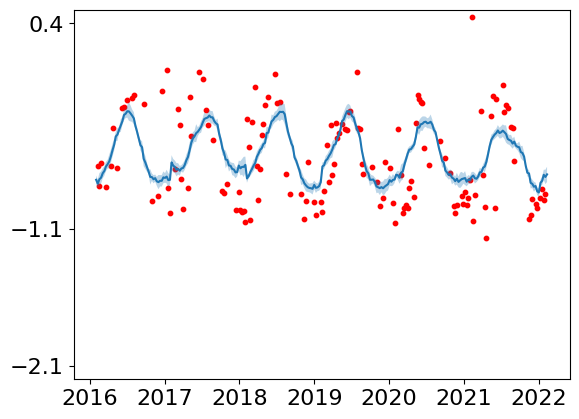

In [21]:
plt.scatter(date, tmp[:,n], c='red', s=10,label="Observed")

predict = deepcopy(prediction_our[index].transpose(1,2).reshape(276,10,4443))
predict = predict[:,:,n]
mean = predict.mean(1)
std = predict.std(1)

plt.plot(date, mean, label="STImp")
plt.fill_between(date, mean-std, mean+std, alpha=0.3)

# plt.legend()
plt.xticks(fontsize=16)
plt.ylim(-2.2,0.5)
plt.yticks([-2.1,-1.1,0.4], fontsize=16)
plt.show()

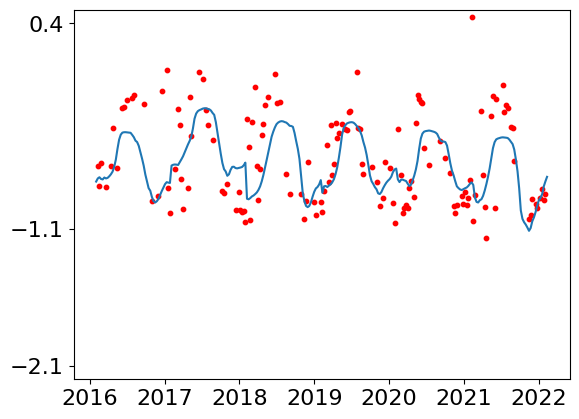

In [22]:
plt.scatter(date, tmp[:,n], c='red', s=10,label="Observed")

predict = deepcopy(prediction_predrnn[index].reshape(276,4443))
predict = predict[:,n]

plt.plot(date, predict, label="STImp")

# plt.legend()
plt.ylim(-2.2,0.5)
plt.yticks([-2.1,-1.1,0.4], fontsize=16)
plt.xticks(fontsize=16)
plt.show()